[*********************100%***********************]  1 of 1 completed


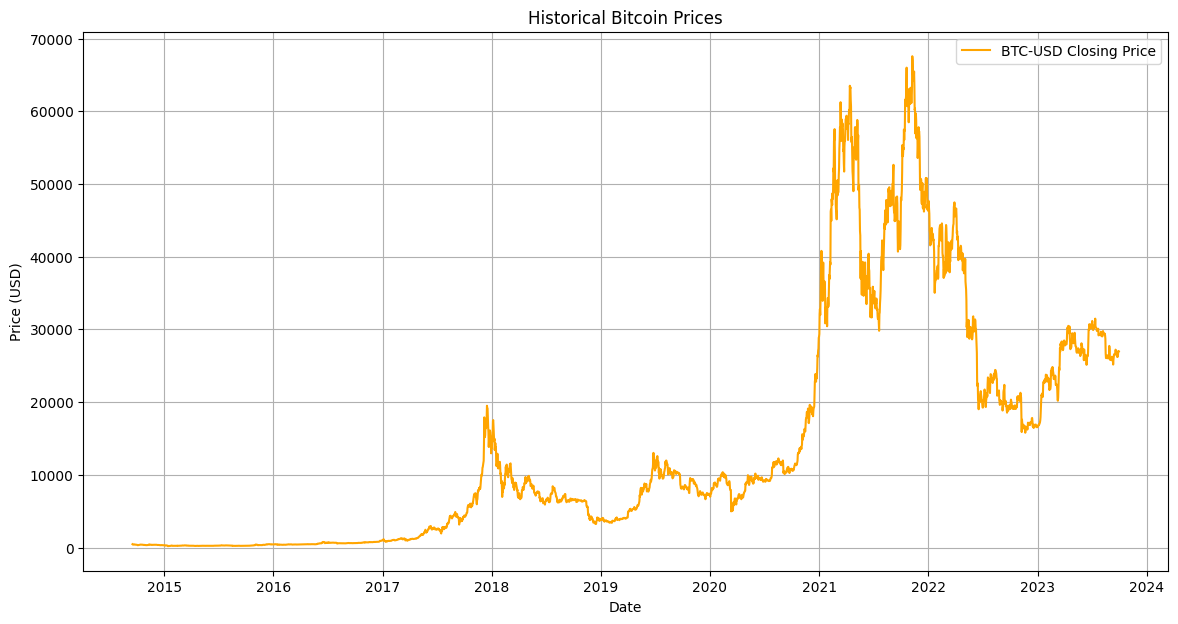

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical data for Bitcoin
btc_data = yf.download('BTC-USD', start='2013-01-01', end='2023-10-01')

# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Close'], label='BTC-USD Closing Price', color='orange')
plt.title('Historical Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


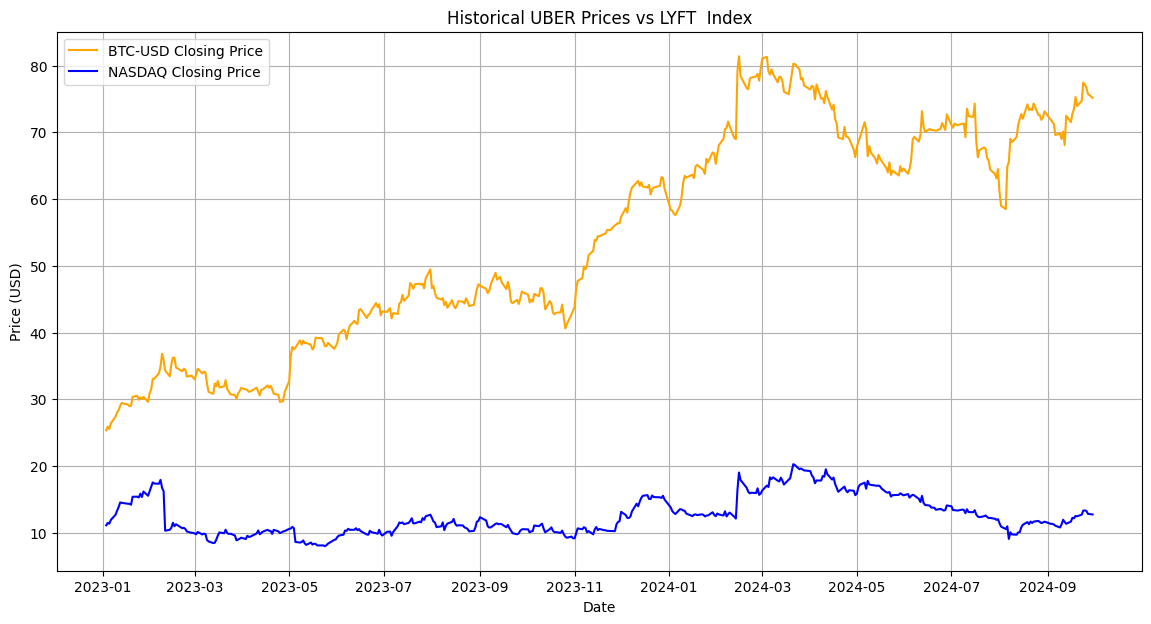

In [25]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical data for Bitcoin and NASDAQ
btc_data = yf.download('UBER', start='2023-01-01', end='2024-10-01')
nasdaq_data = yf.download('LYFT', start='2023-01-01', end='2024-10-01')

# Create a figure and axis
plt.figure(figsize=(14, 7))

# Plot Bitcoin Closing Price
plt.plot(btc_data['Close'], label='BTC-USD Closing Price', color='orange')

# Plot NASDAQ Closing Price
plt.plot(nasdaq_data['Close'], label='NASDAQ Closing Price', color='blue')

# Add titles and labels
plt.title('Historical UBER Prices vs LYFT  Index')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [22]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def analyze_correlations(btc_data, nasdaq_data, start_date='2022-01-01', end_date='2024-10-01'):
    # Create DataFrames with the closing prices
    btc_df = pd.DataFrame(btc_data['Close'])
    nasdaq_df = pd.DataFrame(nasdaq_data['Close'])
    
    # Rename columns for clarity
    btc_df.columns = ['BTC_Close']
    nasdaq_df.columns = ['NASDAQ_Close']
    
    # Inner join the dataframes on index (date)
    combined_df = btc_df.join(nasdaq_df, how='inner')
    
    # Calculate daily returns
    combined_df['BTC_Returns'] = combined_df['BTC_Close'].pct_change()
    combined_df['NASDAQ_Returns'] = combined_df['NASDAQ_Close'].pct_change()
    
    # Remove any NaN values
    combined_df = combined_df.dropna()
    
    # Calculate Pearson correlation
    correlation = combined_df['BTC_Returns'].corr(combined_df['NASDAQ_Returns'])
    
    # Calculate rolling 30-day correlation
    rolling_correlation = combined_df['BTC_Returns'].rolling(window=30).corr(combined_df['NASDAQ_Returns'])
    
    # Calculate descriptive statistics
    stats_dict = {
        'Total Trading Days': len(combined_df),
        'BTC Mean Daily Return': combined_df['BTC_Returns'].mean(),
        'NASDAQ Mean Daily Return': combined_df['NASDAQ_Returns'].mean(),
        'BTC Volatility': combined_df['BTC_Returns'].std(),
        'NASDAQ Volatility': combined_df['NASDAQ_Returns'].std(),
        'Correlation Coefficient': correlation
    }
    
    return combined_df, rolling_correlation, stats_dict

# Download the data
btc_data = yf.download('BTC-USD', start='2022-01-01', end='2024-10-01')
nasdaq_data = yf.download('^IXIC', start='2022-01-01', end='2024-10-01')

# Run the analysis
combined_df, rolling_correlation, stats = analyze_correlations(btc_data, nasdaq_data)

# Print results
print("\nAnalysis Results:")
print("-" * 50)
for key, value in stats.items():
    if isinstance(value, float):
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value}")

# First few rows of the aligned data
print("\nFirst few rows of aligned data:")
print(combined_df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Analysis Results:
--------------------------------------------------
Total Trading Days: 688
BTC Mean Daily Return: 0.0011
NASDAQ Mean Daily Return: 0.0003
BTC Volatility: 0.0357
NASDAQ Volatility: 0.0151
Correlation Coefficient: 0.4388

First few rows of aligned data:
               BTC_Close  NASDAQ_Close  BTC_Returns  NASDAQ_Returns
Date                                                               
2022-01-04  45897.574219  15622.719727    -0.012066       -0.013269
2022-01-05  43569.003906  15100.169922    -0.050734       -0.033448
2022-01-06  43160.929688  15080.860352    -0.009366       -0.001279
2022-01-07  41557.902344  14935.900391    -0.037141       -0.009612
2022-01-10  41821.261719  14942.830078     0.006337        0.000464


In [16]:
nasdaq_close

Ticker,^IXIC
Date,
2022-01-03,15832.799805
2022-01-04,15622.719727
2022-01-05,15100.169922
2022-01-06,15080.860352
2022-01-07,14935.900391
...,...
2024-09-24,18074.519531
2024-09-25,18082.210938
2024-09-26,18190.289062


In [21]:
!pip install scipy

   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ----- ---------------------------------- 6.6/44.5 MB 36.6 MB/s eta 0:00:02
   -------------- ------------------------- 16.5/44.5 MB 41.6 MB/s eta 0:00:01
   ------------------------ --------------- 27.3/44.5 MB 44.3 MB/s eta 0:00:01
   --------------------------------- ------ 37.7/44.5 MB 46.1 MB/s eta 0:00:01
   ---------------------------------------- 44.5/44.5 MB 43.6 MB/s eta 0:00:00
